# Data Cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
crash = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", na_values = ["Unspecified"])
pd.set_option('display.max_columns', None)
crash.head()

/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/06/2020,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,04/28/2020,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,03/18/2020,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,05/07/2020,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,03/06/2020,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [3]:
new_columns = ["date","time","borough","zipcode", "latitude", "longitude", "location", "on_street", "cross_street", "off_street", "num_persons_injured", "num_persons_killed", "num_ped_injured", "num_ped_killed", "num_cyc_injured", "num_cyc_killed", "num_mot_injured", "num_mot_killed", "con_vehicle_1", "con_vehicle_2", "con_vehicle_3", "con_vehicle_4", "con_vehicle_5", "collision_id", "vehicle_type_1", "vehicle_type_2", "vehicle_type_3", "vehicle_type_4", "vehicle_type_5"]
crash.columns = new_columns

In [4]:
crash["collision_id"] = crash["collision_id"].astype(object)

In [5]:
crash.dropna(subset = ["con_vehicle_4" , "con_vehicle_5", "vehicle_type_4", "vehicle_type_5"])
crash.head(10)

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,03/06/2020,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,04/28/2020,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,03/18/2020,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,05/07/2020,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,03/06/2020,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
5,05/05/2020,12:30,QUEENS,11004,40.736750,-73.711040,"(40.73675, -73.71104)",HILLSIDE AVENUE,257 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4311977,Sedan,Pick-up Truck,NaN,NaN,NaN
6,05/10/2020,13:05,NaN,NaN,40.700836,-73.985940,"(40.700836, -73.98594)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312670,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
7,03/13/2020,9:55,QUEENS,11106,40.757330,-73.931360,"(40.75733, -73.93136)",29 STREET,36 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4300244,Taxi,NaN,NaN,NaN,NaN
8,03/03/2020,8:05,BRONX,10460,40.835342,-73.865080,"(40.835342, -73.86508)",WOOD AVENUE,THIERIOT AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4297288,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9,04/03/2020,11:00,NaN,NaN,40.618240,-73.984080,"(40.61824, -73.98408)",62 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4307462,Box Truck,Box Truck,NaN,NaN,NaN


In [6]:
crash["date"] = pd.to_datetime(crash["date"])
crash.head()

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,2020-03-06,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2020-04-28,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2020-03-18,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,2020-05-07,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,2020-03-06,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [7]:
crash["date"] = crash["date"].dt.year

In [8]:
crash["time"] = pd.to_datetime(crash["time"])

In [9]:
crash = crash[["date","time","num_persons_injured", "num_persons_killed","num_ped_injured", "num_ped_killed", "num_cyc_injured", "num_cyc_killed", "num_mot_injured", "num_mot_killed"]]

In [10]:
filt1 = crash["date"] == 2020
crash2020 = crash[filt1]
crash2020.head()

,date,time,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed
0,2020,2021-05-02 06:56:00,0.0,0.0,0,0,0,0,0,0
1,2020,2021-05-02 17:35:00,0.0,0.0,0,0,0,0,0,0
2,2020,2021-05-02 14:00:00,1.0,0.0,0,0,0,0,1,0
3,2020,2021-05-02 22:14:00,0.0,0.0,0,0,0,0,0,0
4,2020,2021-05-02 17:16:00,0.0,0.0,0,0,0,0,0,0


In [11]:
crash2020.dropna()

,date,time,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed
0,2020,2021-05-02 06:56:00,0.0,0.0,0,0,0,0,0,0
1,2020,2021-05-02 17:35:00,0.0,0.0,0,0,0,0,0,0
2,2020,2021-05-02 14:00:00,1.0,0.0,0,0,0,0,1,0
3,2020,2021-05-02 22:14:00,0.0,0.0,0,0,0,0,0,0
4,2020,2021-05-02 17:16:00,0.0,0.0,0,0,0,0,0,0
5,2020,2021-05-02 12:30:00,0.0,0.0,0,0,0,0,0,0
6,2020,2021-05-02 13:05:00,1.0,0.0,0,0,0,0,1,0
7,2020,2021-05-02 09:55:00,0.0,0.0,0,0,0,0,0,0
8,2020,2021-05-02 08:05:00,0.0,0.0,0,0,0,0,0,0
9,2020,2021-05-02 11:00:00,0.0,0.0,0,0,0,0,0,0


In [12]:
len(crash2020)

112834

In [13]:
crash2020.dtypes

date                            int64
time                   datetime64[ns]
num_persons_injured           float64
num_persons_killed            float64
num_ped_injured                 int64
num_ped_killed                  int64
num_cyc_injured                 int64
num_cyc_killed                  int64
num_mot_injured                 int64
num_mot_killed                  int64
dtype: object

# Heatmap

In [14]:
crash2020 = crash = crash[["num_persons_injured", "num_persons_killed","num_ped_injured", "num_ped_killed", "num_cyc_injured", "num_cyc_killed", "num_mot_injured", "num_mot_killed"]]

In [15]:
crash2020.corr()

,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed
num_persons_injured,1.000000,0.017461,0.287296,0.003736,0.173338,0.000190,0.910358,0.022411
num_persons_killed,0.017461,1.000000,0.008211,0.711400,-0.003356,0.280540,0.016048,0.650488
num_ped_injured,0.287296,0.008211,1.000000,0.013014,-0.029024,0.001822,-0.058809,-0.002109
num_ped_killed,0.003736,0.711400,0.013014,1.000000,-0.002513,0.026202,-0.000252,0.006585
num_cyc_injured,0.173338,-0.003356,-0.029024,-0.002513,1.000000,0.001598,-0.044925,-0.003087
num_cyc_killed,0.000190,0.280540,0.001822,0.026202,0.001598,1.000000,-0.000854,-0.000198
num_mot_injured,0.910358,0.016048,-0.058809,-0.000252,-0.044925,-0.000854,1.000000,0.025335
num_mot_killed,0.022411,0.650488,-0.002109,0.006585,-0.003087,-0.000198,0.025335,1.000000


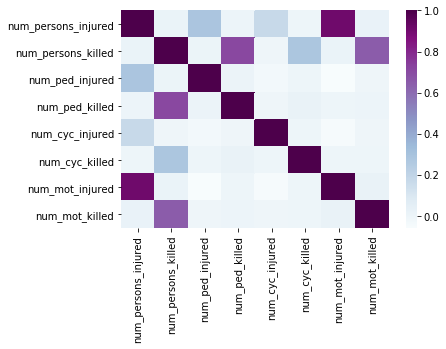

In [19]:
corr_matrix = crash2020.corr()
sns.heatmap(corr_matrix, cmap="BuPu")

Heatmaps are used to visualize the correlation between quantitative variables. Each different pair of variables will have a correlation between 0 and 1; 0 meaning that there is no correlation and 1 meaning that there is a high correlation. Columns of the same name will always have a correlation coefficient of 1 because they are exactly alike (for example, num_persons_injured and num_persons_injured have a correlation coefficient of 1). The darker the intersection between two variables, the higher their correlation. Similarly, the lighter the intersection between two variables, the lower their correlation. Heatmaps plot correlations from correlation coefficients from correlation matrices. 

To create my heatmap, first I completed a correlation matrix for all the quantitative varibales in my dataset (which I filtered for crashes that happened in 2020). Then I used the sns.heatmap funtion to create it. I used the parameter, cmap="BuPu". So intersections that are closer to purple are more correlated than intersetions that are blue. 

Pictured is a heatmap of all the quanititaive and discrete variables in the Crashes and Collisions dataset. For the most part, many of the variables are not correlated. However, the number of motorists injured and the number of people injured, the number of pedestrians killed and the number of people killed, and the number of motorists killed and number of people killed are highly correlated. These correlations make sense as pedestrians and motorists are part of the total number of people injured or killed in crashes. 